In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
rc('figure', figsize=(4,2.5))
rc('legend', fontsize='small')
rc('font', family='serif')
#rc('xtick', labelsize='small')
#rc('ytick', labelsize='small')

def fix_fig(f):
    for a in f.get_axes():
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        #a.yaxis.set_ticks_position('left')
        a.xaxis.set_ticks_position('bottom')
    f.set_tight_layout(True)

Populating the interactive namespace from numpy and matplotlib



Bad key "axes.color_cycle" on line 240 in
/Users/jonny/Library/Mobile Documents/com~apple~CloudDocs/Documents/YHayPi/aa103/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Specific Impulse, SFC and Efficiencies

### Assumptions for topics already covered
- Equation for thrust - $T = \dot{m}_{in}(U_e - U_0) + (P_e - P_0)A_e + \dot{m}_pU_e$
    - Reduces to $T = (P_e - P_0)A_e + \dot{m}_pU_e$ for rocket case
- Rocket equation - $\Delta V = C \ln \frac{m_0}{m_f}$
- Isentropic flow through nozzles, critical flow, supersonic flow in de laval nozzle

## C and Isp

Now that we have covered the basic mechanics of thrust and the isentropic nozzle relations we will begin to show how these apply to rockets by defining a set of convenient parameters.

<img src="imgs/nozzle_pressure.png">

Let's start by remembering that, for a rocket

$$T = (P_e - P_0)A_e + \dot{m}_pU_e$$

Our intuition tells us that a good parameter for the effectiveness of a rocket is the quotient of thrust (what we want) with propellant mass flowrate (what we have to pay):

$$\frac{T}{\dot{m}} = (P_e - P_0)\frac{Ae}{\dot{m}} + U_e$$

This parameter is called effective exhaust velocity, $C = \frac{T}{\dot{m}}$ and is one of the most important in rocketry.  It figures prominently in the Rocket Equation 

$$\Delta V = C \ln \frac{M_0}{M_f}$$

which we will be derived in a couple lectures. 

If we assume $T$ and $\dot{m}$ are completely independent (which we will see is not always true), we can also interpret $C$ as

$$C = \frac{\int T dt}{\int \dot{m} dt} = \frac{I}{M_p}$$

which is how much total impulse we get from a unit mass of propellant.  This interpretation points to a very closely related parameter called Specific Impulse, $I_{sp}$:

$$I_{sp} = \frac{C}{g_0} = \frac{T}{g_0\dot{m}}$$

Notice that $I_{sp}$ is just $C$ normalized by Earth's gravitational acceleration with overall units of seconds.  While at first a bit non-sensical, $I_{sp}$ makes sense when you consider your propellant consumption as a weight flowrate rather than a mass-flowrate and so you are dividing thrust (a force) by weight flowrate (force per time) to arrive at a time.  The etymology of $I_{sp}$ is rooted in the fact that for imperial units we typically work in lbm. rather than slugs.

And while weird at first, the units of seconds do have some intuitive utility.  For a rocket with $I_{sp} = 100 \text{s}$ a unit mass, $m$ of propellant can generate $T=g_0 m$ thrust for 100 seconds or $T = 100 g_0 m$ thrust for one second.

Specific impulse is popularly spoken of as the "gas mileage" for a rocket cycle and this is fairly reasonable - it fundamentally indicates how much bang for the buck you get.  I'll jump the gun just a bit for the sake of intuition and give some typical $I_{sp}$ values for different types of propulsion:

<table>
<tr>
    <th>Technology</th>
    <th>Isp (s)</th>
    <th>Exhaust Velocity (m/s)</th>
</tr>
<tr>
    <td>Reflective Photon Propulsion</td>
    <td>$\infty$</td>
    <td>$\infty$</td>
</tr>
<tr>
    <td>Electric Propulsion</td>
    <td>1000 - 10,000</td>
    <td>9,800 - 98,000</td>
</tr>
<tr>
    <td>Nuclear Thermal / Beamed Energy Propulsion</td>
    <td>600 - 1,000</td>
    <td>5,900 - 9,800</td>
</tr>
<tr>
    <td>Bipropellant Chemical Propulsion</td>
    <td>200 - 500</td>
    <td>2,000 - 4,900</td>
</tr>
<tr>
    <td>Monopropellant Chemical Propulsion</td>
    <td>100 - 250</td>
    <td>980 - 2,450</td>
</tr>
<tr>
    <td>Cold Gas Propulsion</td>
    <td>10 - 120</td>
    <td>100 - 1,150</td>
</tr>
</table>

I bet you're intrigued by the first row... not to worry this will be covered later in the course.

This is all well and good, but all we have really done at this point is some algebra.  What we really are interested in as engineers is how do I get the most gas mileage out of my rocket.  And for that discussion, we'll first define another couple useful parameters.

## c*

No we will go back, for a moment, to choked compressible flow.  With the isentropic flow equations and the $M=1$ choked condition, we can derive (assuming constant $C_p$, $C_v$ and $R$):

$$\dot{m} = \rho_c a_c A_c  = \rho_t \left[ \frac{\rho_c}{\rho_t}\right]a_0 \left[ \frac{a_c}{a_t}\right]A_c = \frac{P_t A_c}{\sqrt{\frac{R T_t}{\gamma}}} \left[\frac{\gamma + 1}{2}\right]^{\frac{2(\gamma-1)}{\gamma+1}}$$

remembering that the $t$ subscript denotes the total or stagnation condition and the $c$ subscript denotes choked ($M=1$) condition.  This is a very useful relationship as it allows us to compute the mass flowrate through a choked nozzle as a function of only nozzle throat area, $A_c$, ideal gas properties and the stangation condition temperature and pressure.  

Let's define a new parameter, called characteristic velocity and denoted $c^{*}$ using this result:

$$c^* = \frac{P_t A_c}{\dot{m}} = \sqrt{\frac{R T_t}{\gamma}}\left[\frac{\gamma + 1}{2}\right]^{\frac{\gamma + 1}{2(\gamma - 1)}}$$

$c^*$ is useful far beyond simple choked flow considerations because it can be both **measured** and **computed**.  And indeed the equation above shows this directly - the LHS is a function relatively measure-able variables pressure, area and mass flowrate.  The RHS is a function of intrinsic gas properties $\gamma$, $R$ and stagnation temperature.  $c^*$ gives us the tools to calculate a parameter (RHS) that we can go and easily measure in the lab (LHS).

Given that $c^*$ depends on $\gamma$, $R$ and $T_t$ it is essentially a function only of the working fluids thermodynamic properties and stagnation (chamber state).  This is not 100% true - when we get to combustion we will see how a (weak) dependency on pressure comes back into $c^*$, but for conceptual purposes we should think of $c^*$ this way - as only a function of intrinsic thermodynamic properties of our propellants.

And so finally we come to a very interesting result regarding the functional dependence of $c^*$:

$$c^* = f(T_t, M_w, \gamma)$$

$R$ is the specific gas constant $R = \frac{R_u}{M_w}$ which is inversely dependent on gas molecular weight, $M_w$.  We can say that

$$c^* \propto \sqrt{\frac{T_t}{M_w}}$$

Moreover $T_t$ is related to the gas internal stagnation enthalpy by $\Delta h_t = \int_{T_0}^{T_t} C_p dT$ and so we should see $T_t$ as a representation of the **energy content** of the rocket gasses.

The effect of $\gamma$ on $c^*$ is a bit more subtle.  $\gamma$ is fundamentally related to the number of vibratory degrees of freedom a molecule has.  For monatomic systems (such as helium or atomic hydrogen) $\gamma$ assymptotes to an upper limit of 1.66.  For most simple diatoms (nitrogen, oxygen, hydrogen) it is around 1.4 and for larger molecules or those with more complex bonding it is lower.  For the conditions we are interested in within a rocket, we wouldn't expect to find $\gamma$ much lower than 1.1.

The plot below shows the effect of $\gamma$ on $c^*$ which is fairly limited compared with $T_t$ and $M_w$.  And so if you take one thing away from this discussion, remember that

$$c^* \propto \sqrt{\frac{\Delta h_t}{\overline{C_p} M_w}}$$

/Users/jonny/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


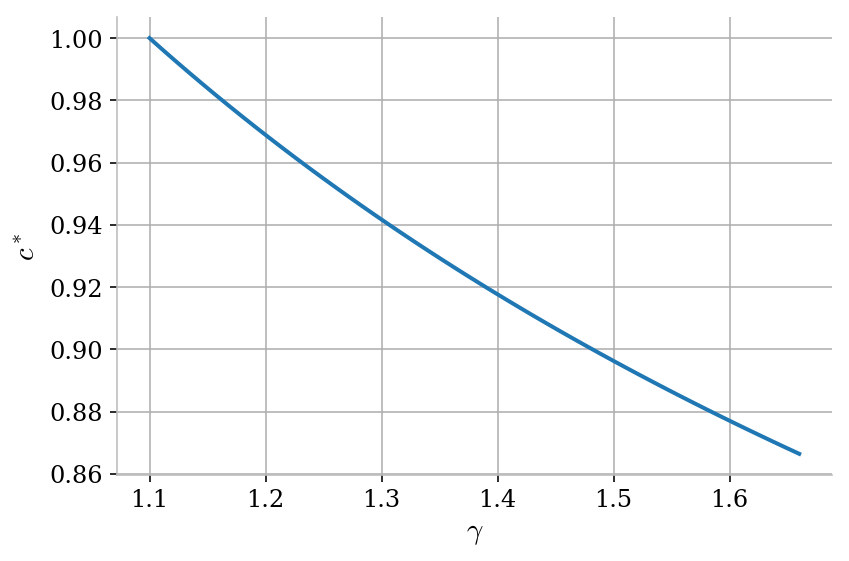

In [2]:
gamma = np.linspace(1.1, 1.66)
cstar_gamm = sqrt(1. / gamma) * ((gamma + 1.)/2.)**((gamma + 1.) / 2. / (gamma - 1.))
f = plt.figure()
plt.plot(gamma, cstar_gamm / cstar_gamm[0])
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$c^*$')
fix_fig(f)
f.savefig('imgs/cstar_gamma.pdf')

## $C_f$

Ok, that's interesting, but for the purposes of rocket performance we want $C$ not $c^*$.  Take a look at the definition of $c^*$ and it looks a lot like our definition of effective velocity and specific impulse above:

$$c^* = \frac{P_t A_c}{\dot{m}} \sim \frac{T}{\dot{m}} = C$$

and indeed $c^*$ and $C$ **are** closely related.

In order to see how, let's define another new parameter, $C_f$ that related thrust to the nozzle throat area and rocket total pressure:

$$C_f = \frac{T}{P_t A_c}$$

In prose this says:

> $C_f$ represents the amount of thrust a rocket can produce given the stagnation pressure of its propellants and a useful characteristic fluid area - the choked area of its nozzle.

Stated differently it is a measure of how effectively we take the stagnation pressure we generate and turn it into thrust.

And since $c^*$ is also defined by chamber pressure and nozzle throat area, $C_f$ becomes the connection between $C$ and $c^*$:

$$C = \frac{T}{\dot{m}} = \frac{C_f P_t A_c}{\dot{m}} = C_f c^*$$

But why split $C$ into $C_f$ and $c^*$ this way?  

Remember that $c^*$ represents the potential of the rocket propellants themselves to create thrust and essentially depends exclusively on the thermodynamic characteristics of those propellants.  $C_f$ represents how well our nozzle can convert the propellant's latent utility into real thrust and thus depends almost exclusively on the physical nature of our nozzle.  And so as we go about maximizing $C$, we can divide that into two separate problems - one of picking propellants ($c^*$) and the other of chosing system pressures and nozzle geometry ($C_f$).

Since the primary role of the nozzle is to convert gasses into thrust $C_f$ can also be seen as a measure of the "goodness" of the nozzle.  It is called **thrust coefficient**.

$C_f$ can be expanded from its definition above:

$$C_f = \frac{C}{c^*} = \frac{(P_e - P_0)\frac{A_e}{\dot{m}} + U_e}{\frac{P_t A_c}{\dot{m}}} = \frac{P_e - P_0}{P_t}\frac{A_e}{A_c} + \frac{U_e}{c^*}$$

It is worth noting that, like the thrust equation, there are two pieces to $C_f$ - $\frac{P_e - P_0}{P_t}\frac{A_e}{A_c}$ is representative of thrust created through pressure force and $\frac{U_e}{c^*}$ is representative of the contribution of gas momentum to thrust.  We will refer to these two components when we discuss optimal nozzle expansion in a minute.

Beyond this things get a little messy and different people attack the derivation different ways.  Rather than putting a whole bunch of alegbra in here, I'm going to provide you the tools needed to compute $C_f$ practically.

$\frac{U_e}{c^*}$, $\frac{P_e}{P_t}$ and $\frac{A_e}{A_c}$ are all related to the isentropic expansion of gasses through the nozzle to its exit.  The exit mach number, $M_e$ thus becomes the common parameter and using classic isentropic relations we can derive the functional relationship of each with $M_e$ as the independent variable:

$$\frac{U_e}{c^*} = \frac{\gamma M_e}{\sqrt{1 + \frac{\gamma - 1}{2}M_e^2}}\left[\frac{\gamma + 1}{2}\right]^{\frac{\gamma + 1}{-2(\gamma-1)}}$$

$$\frac{P_e}{P_t} = \left(1 + \frac{\gamma - 1}{2}M_e^2\right)^{\frac{-\gamma}{\gamma-1}}$$

$$\frac{A_e}{A_c} = \left[\frac{\gamma + 1}{2}\right]^{\frac{\gamma + 1}{-2(\gamma - 1)}} \frac{\left(1 + \frac{\gamma-1}{2}M_e^2 \right)^{\frac{\gamma + 1}{2(\gamma - 1)}}}{M_e}$$

This is a useful form because it shows very clearly that $\frac{U_e}{c^*}$, $\frac{P_e}{P_t}$ and $\frac{A_e}{A_c}$ are not all independent (they all depend on $M_e$).  In fact the dimensionality of this set is one - picking a number for any one of these directlys sets the others.  Furthermore note that these equations, unlike $c^*$, have **no depdencency on stagnation temperature or $M_w$ and thus no direct dependency on propellant properties**.  They do depend on $\gamma$ which is a property of the working fluid but as with $c^*$, the dependence is not terribly strong and is really set for us by the propellant choice we made in optimizing $c^*$.

I'd like to look at how the parameter we can control directly, $\frac{A_e}{A_c}$, affects the others and $C_f$.  Using the equations above, we will sweep through $M_e$ and compute the other parameters directly.

## Optimal Nozzle Expansion

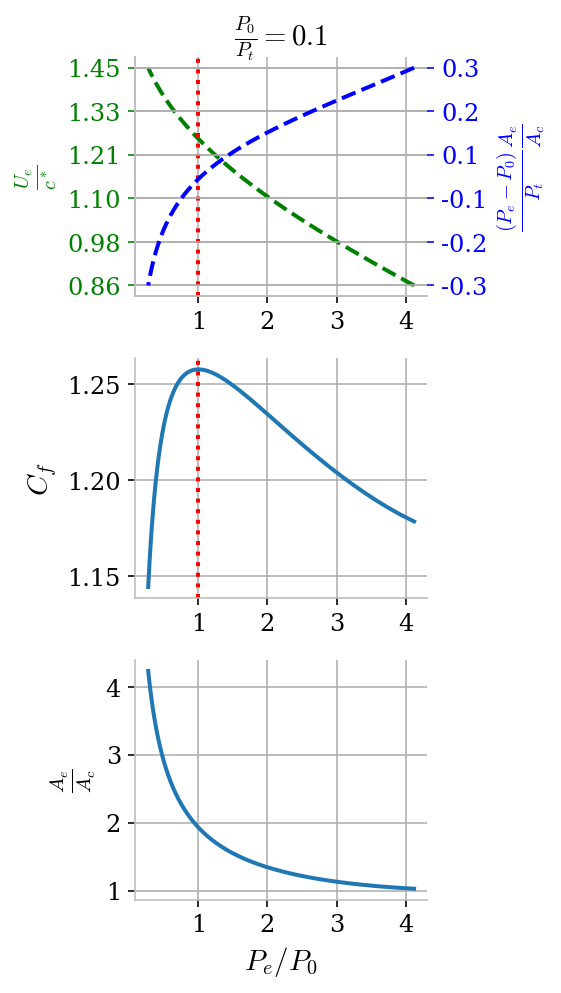

In [27]:
gamma = 1.4
P0_Pt = 0.1
Pe_P0 = 1.

Me = np.linspace(1.2, 3)

Ae_Ac = (((gamma + 1.) / 2.)**((gamma + 1)/-2./(gamma - 1)) / Me * 
            (1. + (gamma - 1) / 2. * Me**2)**((gamma + 1)/2./(gamma - 1)))

Pe_Pt = (1. + (gamma - 1.)/2. * Me**2)**(-gamma / (gamma - 1))

Cf_mom = (gamma * Me / np.sqrt(1 + (gamma - 1.) / 2 * Me**2) * 
            ((gamma + 1) / 2)**((gamma + 1.) / 2 / (1. - gamma)))

Cf_mom = (np.sqrt(2 * gamma**2 / (gamma - 1) * (2 / (gamma + 1))**((gamma + 1)/(gamma - 1)) * 
            (1. - Pe_Pt**((gamma - 1) / gamma))))
    
Cf_press = (Pe_Pt - P0_Pt) * Ae_Ac

f = plt.figure(figsize=(4,7))
plt.subplot(311)
plt.title(r'$\frac{P_0}{P_t} = %.1f$' % P0_Pt)
plt.plot(Pe_Pt / P0_Pt, Cf_mom, 'g--', label='Cf (momentum)')
ax1 = plt.gca()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_ylabel(r'$\frac{U_e}{c^*}$', color='g')
ax1.set_yticks(np.linspace(np.min(Cf_mom), np.max(Cf_mom), 6))
ax1.set_xticks(np.linspace(0, 4, 5))
ax1.tick_params('y', colors='g')
plt.axvline(1, c='r', ls=':')
ax2 = plt.twinx()
ax2.plot(Pe_Pt / P0_Pt, Cf_press, 'b--')
ax2.set_yticks(np.linspace(np.min(Cf_press), np.max(Cf_press), 6))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_ylabel(r'$\frac{(P_e - P_0)}{P_t}\frac{A_e}{A_c}$', color='b')
ax2.tick_params('y', colors='b')

#f.legend()

plt.subplot(312, sharex=ax1)
plt.plot(Pe_Pt / P0_Pt, Cf_mom + Cf_press, label='Cf')
plt.axvline(1, c='r', ls=':')
plt.ylabel(r'$C_f$')

plt.subplot(313, sharex=ax1)
plt.plot(Pe_Pt / P0_Pt, Ae_Ac)
plt.ylabel(r'$\frac{A_e}{A_c}$')
plt.xlabel(r'$P_e/P_0$')
fix_fig(f)
f.savefig('imgs/Cf.pdf')

Note that $C_f$ reaches a maximum where $\frac{P_e}{P_0} = 1$.  This is called optimal expansion.  It is a fundamental result in rocket theory and can be stated:

> Rocket effective exhaust velocity (and therefore specific impulse) is maximized when the nozzle expands the exhaust gasses such that they match the local pressure at the nozzle exit.

This says that, in general, we want to design a rocket nozzle to match the exit pressure to ambient pressure.  This is difficult to do for a rocket ascending through the atmosphere where the pressure is continuosly changing.  For traditional nozzles, a compromise that looks at the average performance over the ascent pressure profile is often chosen.

<img src="imgs/nozzle_sl_vacuum.svg">

And since the way we lower exit pressure is with a bigger expansion ratio, $\epsilon = \frac{A_e}{A_c}$, this result explains why upper stage "vacuum nozzles" are so much bigger than first stage "sea-level" nozzles as can be seen in graphic above and the side-by-side of the SpaceX Merlin 1D vacuum (left) and Merlin 1D sea-level (right) engines:

<img src="imgs/merlin.png">

## Putting it all together

**So the separation of $C$ into $c^*$ and $C_f$ separates concerns between propellant thermodyanmics in $c^*$ and nozzle physical parameters in $C_f$.**

Let's do a quickly compute $C$, $c^*$ and $C_f$ to get a sense of how we would begin to use them practically.  Assume we start with a plenum full of room-temperature, high pressure nitrogen and then vent it into vacuum through a nozzle.  We'll say our gas thermodynamic properties are given by:

- $T_t = 298 \text{K}$
- $\gamma = 1.4$
- $M = .028 \text{kg/mol}$ 

Now let's compute $c^*$, $C_f$ and then $C$.  For now we will assume optimal expansion and calculate the associated area ratio.  A useful relation we will use to determine $M_e$ is:

$$M_e^2 = 2\left(\frac{\frac{Pe}{Pt}^{\frac{1-\gamma}{\gamma}}-1}{\gamma-1}\right) = 2\left(\frac{\left(\frac{P_e}{P_0}\frac{P_0}{P_t}\right)^{\frac{1-\gamma}{\gamma}}-1}{\gamma-1}\right)$$

In [99]:
gamma = 1.4
Ru = 8.314
M = .028              # kg / mol
Tt = 298              # K
P0_Pt = 0.1
Pe_P0 = 1.

def cstar_f(M, Tt, gamma):
    R = Ru / M
    return np.sqrt(R * Tt / gamma) * ((gamma + 1) / 2)**((gamma + 1.) / 2 / (gamma - 1.))

def Me2_f(Pe_Pt, gamma):
    return 2. * (Pe_Pt**((1 - gamma)/gamma) - 1) / (gamma - 1)

def Ae_Ac_f(Me, gamma):
    return (((gamma + 1.) / 2.)**((gamma + 1)/-2./(gamma - 1)) / Me * 
            (1. + (gamma - 1) / 2. * Me**2)**((gamma + 1)/2./(gamma - 1)))

def Cf_f(Pe_Pt, P0_Pt, Ae_Ac, Me):
    return ((Pe_Pt - P0_Pt) * Ae_Ac + (gamma * Me / np.sqrt(1 + (gamma - 1.) / 2 * Me**2) * 
            ((gamma + 1) / 2)**((gamma + 1.) / 2 / (1. - gamma))))

cstar = cstar_f(M, Tt, gamma)
Me = sqrt(Me2_f(Pe_P0 * P0_Pt, gamma))
Ae_Ac = Ae_Ac_f(Me, gamma)
Cf = Cf_f(Pe_P0 * P0_Pt, P0_Pt, Ae_Ac, Me)
C = cstar * Cf

print 'c* = %.1f m/s' % cstar
print 'Me = %.1f' % Me
print 'Ae_Ac = %.1f' % Ae_Ac
print 'Cf = %.2f' % Cf
print 'C = %.1f m/s (Isp = %.1f s)' % (C, C/9.81)

c* = 434.4 m/s
Me = 2.2
Ae_Ac = 1.9
Cf = 1.26
C = 546.4 m/s (Isp = 55.7 s)


This is pretty unimpressive performance.  What if we compute the same for helium?

In [105]:
gamma = 1.66
M = .004              # kg / mol
Tt = 298

cstar = cstar_f(M, Tt, gamma)
Me = sqrt(Me2_f(Pe_P0 * P0_Pt, gamma))
Ae_Ac = Ae_Ac_f(Me, gamma)
Cf = Cf_f(Pe_P0 * P0_Pt, P0_Pt, Ae_Ac, Me)
C = cstar * Cf

print 'c* = %.1f m/s' % cstar
print 'Me = %.1f' % Me
print 'Ae_Ac = %.1f' % Ae_Ac
print 'Cf = %.2f' % Cf
print 'C = %.1f m/s (Isp = %.1f s)' % (C, C/9.81)

c* = 1085.2 m/s
Me = 2.1
Ae_Ac = 1.7
Cf = 1.26
C = 1366.9 m/s (Isp = 139.3 s)


And finally hydrogen....

In [106]:
gamma = 1.4
M = .002              # kg / mol
Tt = 298

cstar = cstar_f(M, Tt, gamma)
Me = sqrt(Me2_f(Pe_P0 * P0_Pt, gamma))
Ae_Ac = Ae_Ac_f(Me, gamma)
Cf = Cf_f(Pe_P0 * P0_Pt, P0_Pt, Ae_Ac, Me)
C = cstar * Cf

print 'c* = %.1f m/s' % cstar
print 'Me = %.1f' % Me
print 'Ae_Ac = %.1f' % Ae_Ac
print 'Cf = %.2f' % Cf
print 'C = %.1f m/s (Isp = %.1f s)' % (C, C/9.81)

c* = 1625.5 m/s
Me = 2.2
Ae_Ac = 1.9
Cf = 1.26
C = 2044.5 m/s (Isp = 208.4 s)


The conclusion from this is that even before we get to chemistry, we can see how wonderful of a working fluid Hydrogen is due to it's low molecular weight.  Remember this because hydrogen will emerge again and again as we talk about rockets.  

As far as a gas goes, Helium is also pretty good and indeed for cold-gas propulsion Helium is often a good choice.  However, being a noble gas, helium is useless for its chemical energy (remember $T_t$ is equally important to $M_w$ and so is will never be competetive with the reacting propellants we will discuss when we get to combustion.

## Energy, thermodynamics and efficiency

So far we have concentrated on propulsion primarily from a conservation of momentum perspective.  But there are a lot interesting observations to be made when we look at the thermodynamics of propulsion as well.

With rocket propulsion and things in space we are talking about **a lot of energy** and to put that in to context, let's see how much energy our Low Earth Orbit satellite ends up with.

An object moving in a conservative potential field (like Earth's gravity) has total energy:

$$E = \text{KE} + \text{PE} = \frac{m v^2}{2} + \frac{GMm}{r}$$

or in **mass-specific energy**

$$\epsilon = \frac{v^2}{2} + \frac{GM}{r}$$

In the case of our satellite in a circular Low Earth Orbit this comes out to:

$$\epsilon = \frac{v^2}{2} + \frac{\mu}{r_0} - \frac{\mu}{r} = 29.1 \text{MJ/kg} + 4.5 \text{MJ/kg} = \mathbf{33.6} \textbf{MJ/kg}$$

Again note how much of this is due to the orbital velocity of the rocket.  And to put in context just how much energy this is, it is equivalent to:

* 1000x the specific energy of a Jet airliner at 650MPH
* 5x the specific chemical energy content of nitroglycerin
* 3x the required specific energy to melt aluminum

It is no wonder that not much is left when object with this much energy slams into the atmosphere!

### Rocket efficiency

Clearly there is a lot of energy being liberated in rocket engines in order to put things into space.  But how efficient are they?

There are different ways to define energy efficiency, but the the first we'll look at is the **thermal efficiency** or how effectively a rocket takes input energy and converts it to gas kinetic energy:

$$\eta_{thermal} = \frac{\dot{W}_{exhaust}}{P_{in}} = \frac{\dot{m}C^2}{2P_{in}}$$

where $P_{in}$ is the amount of energy being liberated in time to power the rocket whether be chemical energy, nuclear or electrical.  In the case of chemical rockets we can define it as the energy released by the propellants when they combust or:

$$P_{in} = \dot{m} \Delta h^0_{rxn}$$

We saw the following equation in a previous chapter:

$$C = \sqrt{\frac{\gamma R T_0 M_e^2}{1+\frac{\gamma-1}{2}M_e^2}} \left[1 +\frac{1}{\gamma M_e^2}\left(1-\frac{P_0}{P_e}\right)\right]$$

If we assume an optimized nozzle with $P_e = P_0$ so that the right part of the equation drops out, and assume $M_e = 7$:

$$C^2 \sim \frac{59R_uT_0}{5.9M_w} \approx \frac{10 R_u\Delta h^0_{rxn}}{\overline{C_p}M_w}$$

Combining these results and 

$$\eta_{thermal} \approx \frac{10R_u}{C_p M_w}$$

If we assume $M_w = 12 \text{g / mol}$ and $\frac{R_u}{\overline{C_p}} \approx \frac{2}{3}$ we get:

$$\eta_{thermal} = \frac{2 \times 10}{3 \times 12} = 56\%$$

This is pretty good for a heat engine!  But the efficiency of accelerating gasses is not really what we care about - we care about the efficiency of accelerating the vehicle.

To understand that, we will define another effiency metric, called **propulsive efficiency** as such

$$\eta_{prop} = \frac{\dot{W}_{r}}{\dot{W}_{r} + \dot{W}_{exhaust}} = \frac{Tv}{Tv + \frac{1}{2}\dot{m}(C - v)^2}$$

or the fraction of total work that actually goes to accelerating the vehicle.

$$\frac{Tv}{Tv + \frac{1}{2}\dot{m}(C - v)^2} = \frac{\dot{m}C v}{\dot{m}\left[C v + (C-v)^2\right]}$$

$$\rightarrow \eta_{prop} = 2\frac{\frac{v}{C}}{1+(\frac{v}{C})^2}$$

The overall efficiency is
$$\eta = \eta_{thermal}\eta_{prop}$$

A small example demonstrating how $\eta$ varies over ratio of vehicle speed to exhaust speed, $\frac{v}{C}$ is shown below.

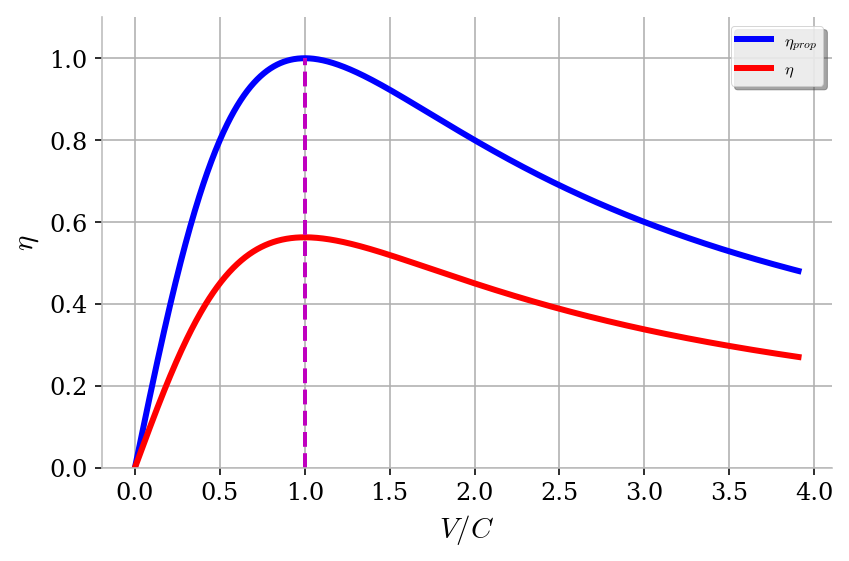

In [29]:
Ru = 8.314        # J / mol-K
Mw = 15e-3      # kg / mol
Cf_max = 2.2
Cv0 = 5 / 2. * Ru / Mw
Cp0 = Cv0 +  Ru / Mw
k = Cp0/Cv0

def carnot(Th, Tc):
    return 1. - Tc / Th

def cstar(Tt, Mw, k):
    return np.sqrt(k * Ru / Mw * Tt) / k / np.sqrt((2 / (k+1))**((k+1)/k-1))

def eff_propulsive(U_C):
    return 2. * U_C / (1. + (U_C)**2)

T0 = 300.
Tt = 3000.
hg = Tt * Cp0

Cmax = Cf_max * cstar(Tt, Mw, k)

P_KE = 0.5 * Cmax**2
eta_KE = P_KE / hg
eta_Carnot = carnot(Tt, T0)

Ur = np.linspace(0, 10000, 1000)

Cmax = Cf_max * cstar(Tt, Mw, k)

P_KE = 0.5 * Cmax**2
eta_KE = P_KE / hg
eta_Carnot = carnot(Tt, T0)
eta_propulsive = eff_propulsive(Ur / Cmax)

f = plt.figure()
plt.plot(Ur/Cmax, eta_propulsive, 'b-', label='$\eta_{prop}$', linewidth=3)
plt.plot(Ur/Cmax, eta_propulsive * eta_KE, 'r-', label='$\eta$', linewidth=3)
plt.plot([1.0, 1.0], [0, 1], 'm--')
plt.ylim(0,1.1)
plt.xlabel('$V/C$')
plt.ylabel('$\eta$')
plt.legend(loc='best')
fix_fig(f)
f.savefig('imgs/prop_eff.pdf')

And here we see another interesting result much like optimal nozzle expansion.  The rocket is most efficient when the exhaust velocity equals the vehicle velocity.  This is actually quite intuitive - in this condition the exhaust gasses are left with zero velocity in the static frame.  There is no residual kinetic energy in the exhaust so all of it's kinetic energy have been transferred to the vehicle.  Anywhere else the exhaust is left with residual kinetic energy which is a loss.

### Energy losses

Let's also look at where the inefficiencies are for a launch vehicle with second stage engine $I_{sp} = 340$ s and moving at 5,000 m/s.

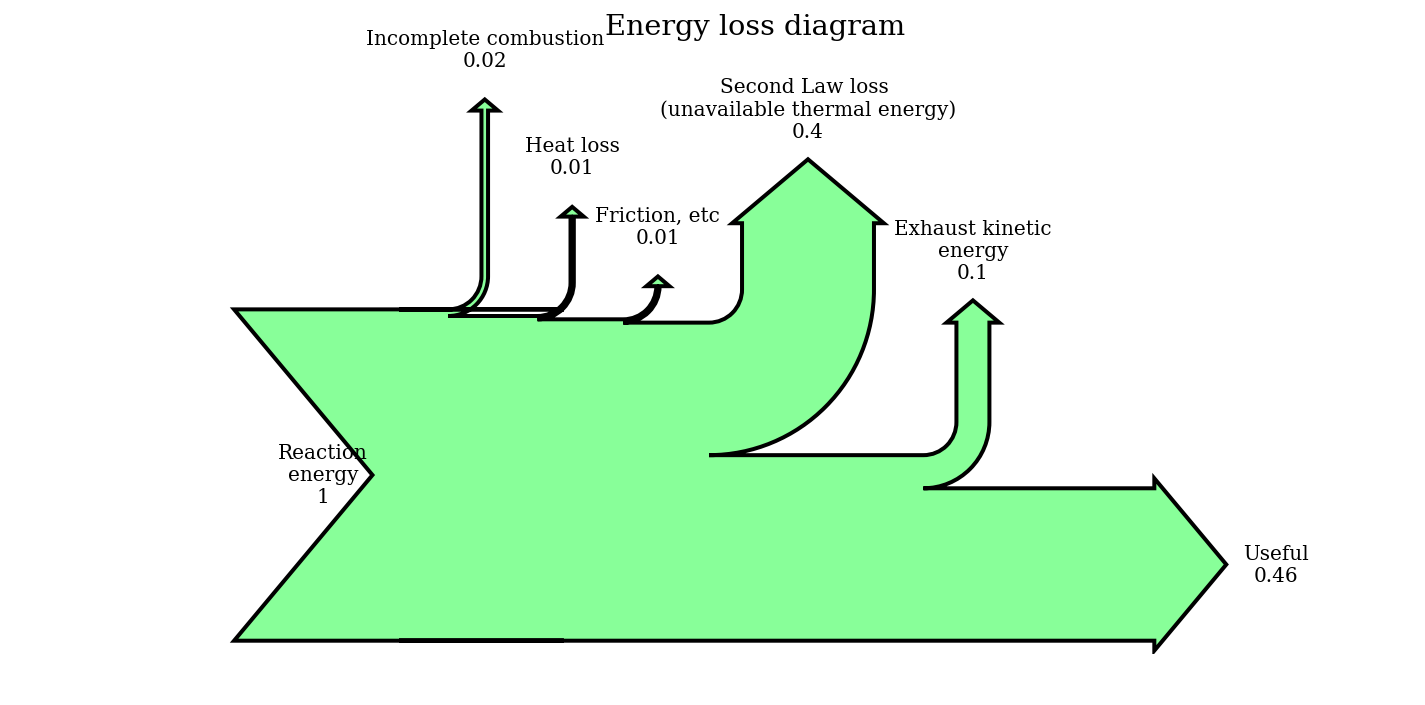

In [32]:
from matplotlib.sankey import Sankey

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
diagram = Sankey(ax=ax, flows=[1.0, -.02, -.01, -.01, -.4, -.1, -0.46],
       labels=['Reaction\nenergy', 'Incomplete combustion', 'Heat loss', 'Friction, etc',
               'Second Law loss \n(unavailable thermal energy)', 'Exhaust kinetic\nenergy', 
               'Useful'],
       orientations=[0, 1, 1, 1, 1, 1, 0],
       trunklength = 0, pathlengths=[1., 0.6, 0.3, 0.1, 0.3, 0.4, .5],
       linewidth=2).finish()
diagram[0].patch.set_facecolor('#88FF99')
diagram[0].patch.set_edgecolor('k')
ax.axis('off')
plt.title("Energy loss diagram")
plt.grid(False)
fix_fig(f)
f.savefig('imgs/sankey.pdf')

## Addendum - Specific Fuel Consumption

## Homework problems.

1. Derive c* from isentropic relations.
2.  Why is the RHS of c* equation difficult to measure for a rocket?
3.  Compute choked mass flowrate for optimal nozzle example given and a 1mm diameter nozzle throat.

## Appendix - Derivation of U_e/cstar todo.